# **Time series weather product pridiction in machine learning**
#### *Learning Objective: Tree algorithm application for Gradiant Boosting regression regression*

## Step 1: Import neccsary pakages

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input, BatchNormalization

## Step 2: Read data from  csv files

In [4]:
import pandas as pd
#Step 1: Read and explore data
file='C:/Users/Addisu/Desktop/kidi files/kidi/Evap/Data/Observed/Metehara/DEVAPll.csv'
raw_data = pd.read_csv(file, parse_dates = ['Date'],
                       index_col = 'Date')
dfml = raw_data.copy()
dfml

,PCP,Tmin,Tmax,Month,year,Tmean,Rhmax,Rhmin,Rhmean,Evapoavg,WS,SH
Date,,,,,,,,,,,,
1993-01-01,0.0,20.8,31.6,1,1993,26.20,75.0,40.0,57.5,3.471109,1.8,8.4
1993-01-02,0.0,17.8,32.0,1,1993,24.90,81.0,44.0,62.5,3.421044,1.6,8.3
1993-01-03,0.0,14.0,33.0,1,1993,23.50,89.0,41.0,65.0,4.001721,1.2,10.5
1993-01-04,0.0,12.6,32.0,1,1993,22.30,91.0,46.0,68.5,3.618233,2.1,9.2
1993-01-05,0.0,16.2,33.8,1,1993,25.00,82.0,43.0,62.5,3.844625,1.4,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,0.0,10.5,31.0,12,2016,20.75,83.0,26.0,54.5,1.150054,0.8,0.1
2016-12-28,0.0,8.4,32.0,12,2016,20.20,86.0,27.0,56.5,3.723602,0.9,10.3
2016-12-29,0.0,9.0,32.0,12,2016,20.50,80.0,28.0,54.0,1.185701,1.0,0.2


## Step 3: Pre prosseing of the data

In [18]:
# Read data from  csv files
X = dfml.drop(["Evapoavg"], axis=1)
y = dfml["Evapoavg"]


Input_data_features = X.values
Input_data_labels =y.values


# standardize input features X and output labels Y
#scaler_standardized_X = StandardScaler()
#Input_data_features = scaler_standardized_X.fit_transform(Input_data_features)

#scaler_standardized_Y = StandardScaler()
#Input_data_labels = scaler_standardized_Y.fit_transform(Input_data_labels)


# Split dataset into train, validation, an test
index_X_Train_End = int(0.7 * len(Input_data_features))
index_X_Validation_End = int(0.9 * len(Input_data_features))

X_train = Input_data_features[0: index_X_Train_End]
X_valid = Input_data_features[index_X_Train_End: index_X_Validation_End]
X_test = Input_data_features[index_X_Validation_End:]
Y_valid = Input_data_labels[index_X_Train_End: index_X_Validation_End]
Y_test = Input_data_labels[index_X_Validation_End:]
Y_train = Input_data_labels[0: index_X_Train_End]



## Step 4: Gradient Boosting Regressor Model and Hyperparamter tuning
### base model estimation

In [33]:
# run the model
base_model = GradientBoostingRegressor().fit(X_train, Y_train)
gb_base = base_model.predict(X_test)

#Evaluation metrics before normalization 
MAE = metrics.mean_absolute_error(Y_test,gb_base)
MSE = metrics.mean_squared_error(Y_test,gb_base)
RMSE = np.sqrt(MSE) # or mse**(0.5) 
MAPE = mean_absolute_error(Y_test,gb_base)*100

print("MAE:",format(MAE, '.3f'))
print("MSE:",format(MSE,'.3f'))
print("RMSE:", format(RMSE,'.3f'))
print("MAPE:",format(MAPE,'.3f') )


# Other Performance metrics

def relative_root_mean_squared_error(actual, predictions,model_name):
    num = np.sum(np.square(actual - predictions))
    den = np.sum(np.square(predictions))
    squared_error = num/den
    rrmse = np.sqrt(squared_error)
    print(model_name + ':')
    print('Relative root mean square error-LSTM: {:.4f}'.format(rrmse))
    return rrmse
def nse(actual, predictions,model_name):
    nse=(1-(np.sum((actual-predictions)**2)/np.sum((actual-np.mean(actual))**2)))
    print(model_name + ':')
    print('Nash-Sutcliff-Efficiency-LSTM: {:.4f}'.format(nse))
    return nse
from scipy import stats

def pbias(actual, predictions,model_name):
    pbias=100 *(sum((actual - predictions)/sum(actual)))
    #print(model_name + ':')
    #print('Percent-of-Bias-bilstm: {:.4f}'.format(pbias))
    return pbias

nse(Y_test, gb_base,'LSTM')
#calc_kge(Y_test,gb_base,'LSTM')
relative_root_mean_squared_error(Y_test,gb_base,'LSTM')
#evaluate_prediction(Y_test,rfr, 'LSTM')
PBIAS_BILSTM=pbias(Y_test, gb_base,'LSTMLSTM')
PBIAS_BILSTM


MAE: 0.040
MSE: 0.003
RMSE: 0.052
MAPE: 3.979
LSTM:
Nash-Sutcliff-Efficiency-LSTM: 0.9965
LSTM:
Relative root mean square error-LSTM: 0.0125


-0.00407143987951014

## Hyperparamter tuning using random search

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               #'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
gb = GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gb, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
gb_random.fit(X_train, Y_train)
gb_random.best_params_
best_random = gb_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)
gb_best = best_random.predict(X_test)
from sklearn import metrics


score = np.sqrt(metrics.mean_squared_error(Y_test,gb_best))
print("Score (RMSE): {}".format(score))

from sklearn.metrics import mean_absolute_error

print('Test MAE  : %.3f'%mean_absolute_error(Y_test,gb_best))
#print('Train MAE : %.3f'%mean_absolute_error(_train, lin_reg.predict(X_train)))

from sklearn.metrics import mean_squared_error, mean_squared_log_error
print('Test MSE  : %.3f'%mean_squared_error(Y_test,gb_best))


Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\anaconda3\envs\jupyterenv

Model Performance
Average Error: 0.0903 degrees.
Accuracy = 96.79%.
Score (RMSE): 0.1509959626490649
Test MAE  : 0.090
Test MSE  : 0.023


## improvment

In [36]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -2.15%.


## Step 5: performance metrics evaluation

In [37]:
def relative_root_mean_squared_error(actual, predictions,model_name):
    num = np.sum(np.square(actual - predictions))
    den = np.sum(np.square(predictions))
    squared_error = num/den
    rrmse = np.sqrt(squared_error)
    print(model_name + ':')
    print('Relative root mean square error-: {:.4f}'.format(rrmse))
    return rrmse
def nse(actual, predictions,model_name):
    nse=(1-(np.sum((actual-predictions)**2)/np.sum((actual-np.mean(actual))**2)))
    print(model_name + ':')
    print('Nash-Sutcliff-Efficiency {:.4f}'.format(nse))
    return nse
from scipy import stats
def calc_kge(actual, predictions,model_name):
    """Calculate the Kling-Gupta-Efficiency.
    
    Calculate the original KGE value following [1].

    Args:
        obs: Array of the observed values
        sim: Array of the simulated values

    Returns:
        The KGE value for the simulation, compared to the observation.

    Raises:
        ValueError: If the arrays are not of equal size or have non-numeric
            values.
        TypeError: If the arrays is not a supported datatype.
        RuntimeError: If the mean or the standard deviation of the observations
            equal 0.
    
    [1] Gupta, H. V., Kling, H., Yilmaz, K. K., & Martinez, G. F. (2009). 
    Decomposition of the mean squared error and NSE performance criteria: 
    Implications for improving hydrological modelling. Journal of Hydrology, 
    377(1-2), 80-91.
    
    """
    # Validation check on the input arrays
    #actual = validate_array_input(actual, np.float64, 'actual')
    #predictions = validate_array_input(predictions, np.float64, 'predictions')
    
    if len(actual) != len(predictions):
        raise ValueError("Arrays must have the same size.")
     
    mean_actual = np.mean(actual)
    if mean_actual == 0:
        msg = "KGE not definied if the mean of the observations equals 0."
        raise RuntimeError(msg)
    
    std_actual = np.std(actual)
    if std_actual == 0:
        msg = ["KGE not definied if the standard deviation of the ",
               "observations equals 0."]
        raise RuntimeError("".join(msg))
    actual = np.ndarray.flatten(actual)
    predictions = np.ndarray.flatten(predictions)
    r = stats.pearsonr(actual, predictions)[0]
    alpha = np.std(predictions) / std_actual
    beta = np.mean(predictions) / mean_actual
    
    kge_val = 1 - np.sqrt((r-1)**2 + (alpha-1)**2 + (beta-1)**2)
    print(model_name + ':')
    print('Kling-Gupta-Efficiency-: {:.4f}'.format(kge_val))
    return kge_val 
def pbias(actual, predictions,model_name):
    pbias=100 *(sum((actual - predictions)/sum(actual)))
    #print(model_name + ':')
    #print('Percent-of-Bias-bilstm: {:.4f}'.format(pbias))
    return pbias

nse(Y_test, gb_base,'base_model')
calc_kge(Y_test, gb_base,'base_model')
relative_root_mean_squared_error(Y_test,gb_base,'base_model')
PBIAS_BILSTM=pbias(Y_test, gb_base,'base_model')
PBIAS_BILSTM






base_model:
Nash-Sutcliff-Efficiency 0.9965
base_model:
Kling-Gupta-Efficiency-: 0.9886
base_model:
Relative root mean square error-: 0.0125


-0.00407143987951014

In [38]:
nse(Y_test, gb_best,'best_model')
calc_kge(Y_test, gb_best,'best_model')
relative_root_mean_squared_error(Y_test,gb_best,'best_model')
PBIAS_BILSTM=pbias(Y_test, gb_best,'best_model')
PBIAS_BILSTM

best_model:
Nash-Sutcliff-Efficiency 0.9705
best_model:
Kling-Gupta-Efficiency-: 0.9095
best_model:
Relative root mean square error-: 0.0364


-0.22387704285498333

## Step 7: visualzation

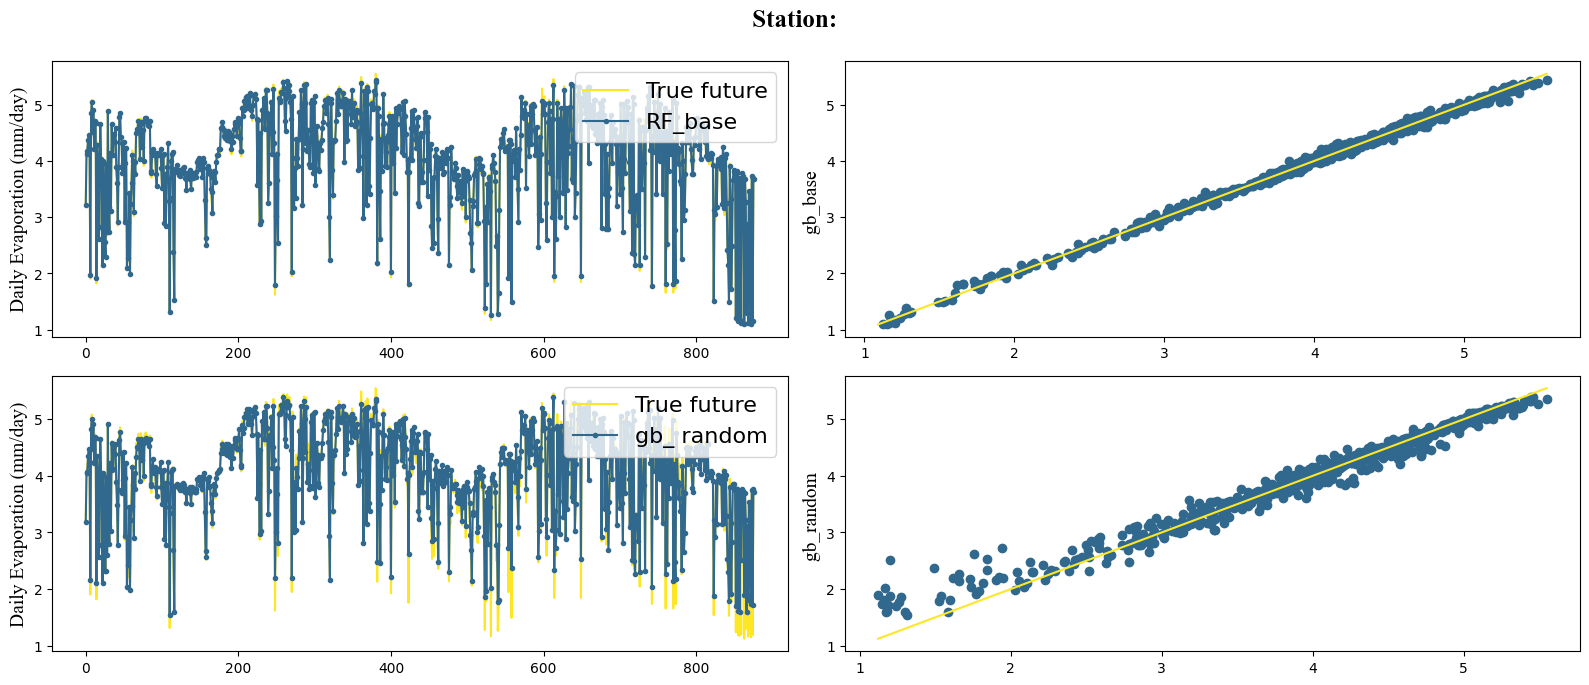

In [41]:
#%%
from matplotlib import pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from matplotlib.gridspec import GridSpec

from matplotlib import gridspec
viridis = cm.get_cmap('viridis', 4)
colors = [viridis(i) for i in range(0, 8)]


gb_best = best_random.predict(X_test)
gb_base = base_model.predict(X_test)

range_futurel = len(gb_best)
range_future2 = len(gb_base)

plt.figure(figsize=(16,16))
G = gridspec.GridSpec(5, 2)
plt.suptitle(' Station: ',fontname="Times New Roman", size=18,fontweight="bold", y=1)

axs_1 = plt.subplot(G[0,0])
#axs_1.set_xlabel('Time (day)', linespacing=3)
axs_1.set_ylabel('Daily Evaporation (mm/day)',fontname="Times New Roman",fontsize=14, linespacing=3)
axs_1.text(0.5, 0.5, '', ha='center', va='center', size=24, alpha=.5)
axs_1.plot(np.arange( range_futurel), np.array(Y_test), label='True Future',c=colors[4])     
axs_1.plot(np.arange( range_future2),np.array(gb_base),label='RFR',c=colors[1],marker = '.')
axs_1.legend(['True future', 'RF_base'], loc='upper right',fontsize=16)

axs_2 = plt.subplot(G[0, 1])
#axs_2.set_xlabel('True Future', linespacing=3)
axs_2.set_ylabel('gb_base ',fontname="Times New Roman", linespacing=3,fontsize=14)
axs_2.scatter(Y_test, gb_base, c=colors[1])
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(gb_base), max(Y_test))
p2 = min(min(gb_base), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-',c=colors[4])
#plt.axis('equal')

axs_3 = plt.subplot(G[1,0])
#axs_1.set_xlabel('Time (day)', linespacing=3)
axs_3.set_ylabel('Daily Evaporation (mm/day)',fontname="Times New Roman",fontsize=14, linespacing=3)
axs_3.text(0.5, 0.5, '', ha='center', va='center', size=24, alpha=.5)
axs_3.plot(np.arange( range_futurel), np.array(Y_test), label='True Future',c=colors[4])     
axs_3.plot(np.arange( range_futurel),np.array(gb_best),label='gb',c=colors[1],marker = '.')
axs_3.legend(['True future', 'gb_ random'], loc='upper right',fontsize=16)

axs_4 = plt.subplot(G[1, 1])
#axs_2.set_xlabel('True Future', linespacing=3)
axs_4.set_ylabel('gb_random ',fontname="Times New Roman", linespacing=3,fontsize=14)
axs_4.scatter(Y_test, gb_best, c=colors[1])
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(gb_best), max(Y_test))
p2 = min(min(gb_best), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-',c=colors[4])
#plt.axis('equal')


results_path = 'me.png'
    #print(results_path)
plt.savefig(results_path,bbox_inches='tight', dpi=300,format="png")

plt.tight_layout()

## **Thankyou.**